In [14]:
#подключим нужные библиотеки и читаем данные
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

import hashlib
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
# from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# from keras.model_selection import train_test_split
from tensorflow import keras
from scipy.ndimage import rotate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
import re
from finta import TA
import tensorflow as tf
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square
from scipy.integrate import quad
from math import*


In [15]:
import numpy as np
from numpy import sin, cos, pi
from scipy.fftpack import fft, fftfreq, ifft
import matplotlib.pyplot as plt
print('Imported successfully')

Imported successfully


C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_10736\4164889520.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Averaged"][index] = Average(arrayToCount)


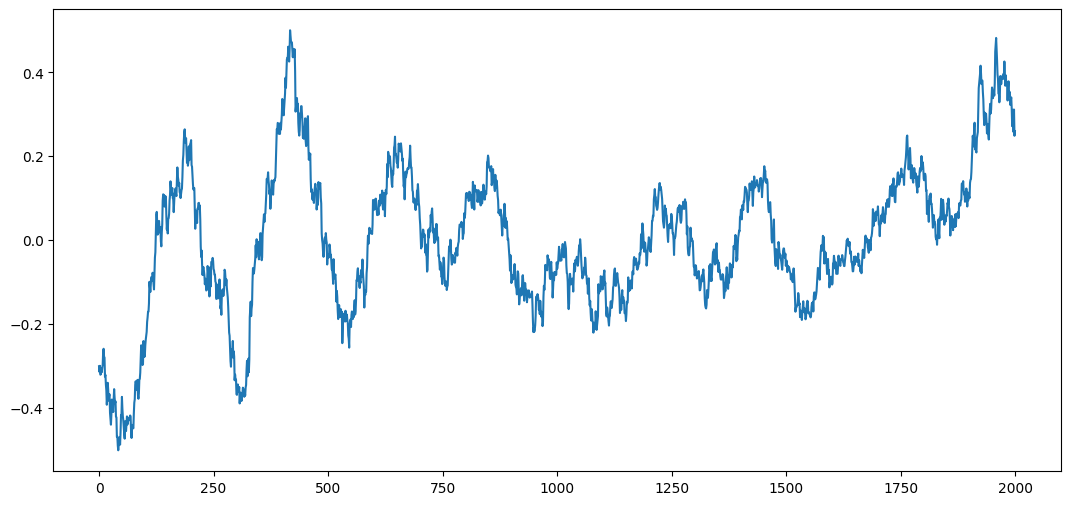

In [16]:
def type2  (data,ot,do):
    def DataPreprocessing(data, candlesNNSee=25, candlesItPredict=1, daysInSingleLable=1, makeLabelsCountEqual=True):
        # dataOriginal = data.copy()
        # data = pandas.read_csv(CSVFileName)
        columnsToDelete = [0, 6]
        data = data.drop(data.columns[columnsToDelete], axis=1)
        data = data.reset_index()  # добавим колонку с индексами

        def Organize_ohlcv(data):
            cols = list(data.columns)
            index, Low, Open, Volume, High, Close = cols.index('index'), cols.index('Low'), cols.index('Open'), cols.index(
                'Volume'), cols.index('High'), cols.index('Close')
            cols[index], cols[Low], cols[Open], cols[Volume], cols[High], cols[Close] = cols[index], cols[Open], cols[High], \
                                                                                        cols[Low], cols[Close], cols[Volume]
            data = data[cols]
            return data

        data = Organize_ohlcv(data)
        data.columns = ['index', 'open', 'high', 'low', 'close', 'volume']  # rename


        # сделаем цены в процентах от предыдущего дня, а не просто значения
        def percent(thisNum, fromBase):
            if fromBase <= 0.1:
                fromBase = thisNum / 10
            if thisNum <= 0.1:
                thisNum = fromBase / 10
            try:
                return (100 / (fromBase / thisNum)) - 100
            except:
                if fromBase <= 0.1:
                    fromBase = thisNum / 10
                if thisNum <= 0.1:
                    thisNum = fromBase / 10
                return (100 / (fromBase / thisNum)) - 100

        def makePercented(data):
            dt = data.copy()
            columns = range(len(list(data)))
            for i in columns:
                if i == 0:
                    continue
                for index, row in data.iterrows():
                    if index == 0:
                        continue
                    N = percent(data.iloc[index, i], data.iloc[index - 1, i])
                    dt.iloc[index, i] = N
            return dt

        data = makePercented(data)


            # добавим колонку с категориями, которые мы будем в итоге угадывать (но тут они пока свои на строку)
        def Average(array):
            summed = 0
            for each in array:
                summed += each
            return summed / len(array)

        def averageLine(data, columns, NLinesToAverage):
            if NLinesToAverage == 1:
                NLinesToAverage = 1
            data['Averaged'] = 0
            for index, row in data.iterrows():
                if index + NLinesToAverage > len(data):
                    NLinesToAverage = len(data) - index
                arrayToCount = []
                for lines in range(NLinesToAverage):
                    for elemntInLine in columns:
                        arrayToCount.append(data.iloc[index + lines, elemntInLine])
                data["Averaged"][index] = Average(arrayToCount)
            return data
        data = averageLine(data, [1, 2, 3, 4], daysInSingleLable)
        
        
        
        SMA = TA.SMA(data, 100)              # Simple Moving Average
        data['SMA'] = SMA
            
        data = data[100:]
        data.reset_index()
        
        return data





    def additionalPrepro(data):
        def makeItNormed(data):
            min_max_scaler = preprocessing.MinMaxScaler()
            df_norm = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)
            return df_norm
            x = data.values  # returns a numpy array
        data = makeItNormed(data)
        data = data.reset_index()

        x = data["index"].to_numpy()
        y = data['SMA'].to_numpy()
        return x, y

    data = DataPreprocessing(data)
    data = data[ot:do]
    x,y = additionalPrepro(data)
    return x,y



    # with average
    # without av
    # normed

    
point = -6000   
length = 2000
x,y = type2(pandas.read_csv("F.csv"),point-length,point)
# x,y = additionalPrepro(data)
df = pd.DataFrame({"SMA": y})
for index, row in df.iterrows():
    df.iloc[index, 0] = df.iloc[index, 0]-0.5

# df.plot()                       
x = df.index.to_numpy()
y = df.SMA.to_numpy()
# y = df.SMA.rolling(50).mean().to_numpy()
    


plt.figure(figsize=(13,6))
plt.plot(y)
plt.show()



In [17]:
def FuryCleaner(data,frequency_thresh=2):
    spectrum=fft(data)
    Fs=len(data)*0.1#260
    delF=0.1
    N=int(Fs/delF)
    spectrum=fft(y)
    F=fftfreq(N,1/Fs)
    Fpositive=np.where(F>=0)
    Frequency = np.absolute(spectrum[Fpositive])/N
    freq_thr=2   #чем больше число, тем больше мы захватываем частот и тем точнее совпадение 
    spectrum_filter= spectrum*(np.absolute(F)<freq_thr)
    signal_filter=ifft(spectrum_filter)
    spectrum_output=fft(signal_filter)
    print(len(x),"=", len(signal_filter))
    return signal_filter, np.absolute(spectrum_output[Fpositive])/N, np.absolute(spectrum[Fpositive])/N




In [18]:
signal, spectrumFiltered, spectrum = FuryCleaner(y,frequency_thresh=2)

2000 = 2000


C:\Users\Xiaomi\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


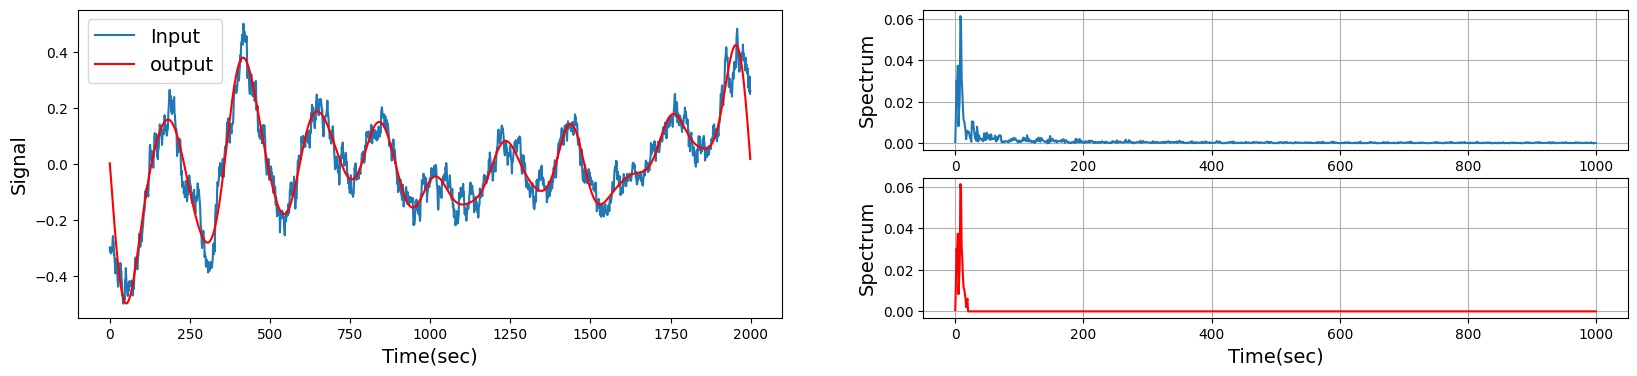

In [19]:
def plotFourie(signal,data, spectrumFiltered, spectrum):
    fig=plt.figure(figsize=(20,4))
    gs=fig.add_gridspec(2,2)

    ax1=fig.add_subplot(gs[:,0])
    ax2=fig.add_subplot(gs[0,1])
    ax3=fig.add_subplot(gs[1,1])

    ax1.plot(data,label='Input')
    ax1.plot(signal,color='r',label='output')
    ax1.legend(fontsize=14)
    ax1.set_xlabel('Time(sec)',fontsize=14)
    ax1.set_ylabel('Signal',fontsize=14)

    ax2.plot(spectrum,label='Input')
    ax2.grid()
    ax1.legend(fontsize=14)
    ax2.set_xlabel('Time(sec)',fontsize=14)
    ax2.set_ylabel('Spectrum',fontsize=14)

    ax3.plot(spectrumFiltered,color='r',label='Output')
    ax3.grid()
    ax1.legend(fontsize=14)
    ax3.set_xlabel('Time(sec)',fontsize=14)
    ax3.set_ylabel('Spectrum',fontsize=14)
plotFourie(signal,y, spectrumFiltered, spectrum)

In [20]:
signalDF = pd.DataFrame(signal)
signalDF = signalDF.reset_index(drop=True)
# signalDF
pd.Series(data=signal)

0       0.001434+0.000000j
1      -0.013981-0.000000j
2      -0.029422-0.000000j
3      -0.044872-0.000000j
4      -0.060310+0.000000j
               ...        
1995    0.077451-0.000000j
1996    0.062450+0.000000j
1997    0.047330-0.000000j
1998    0.032108-0.000000j
1999    0.016803-0.000000j
Length: 2000, dtype: complex128

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import STL

C:\Users\Xiaomi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:894: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._values, dtype)
C:\Users\Xiaomi\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


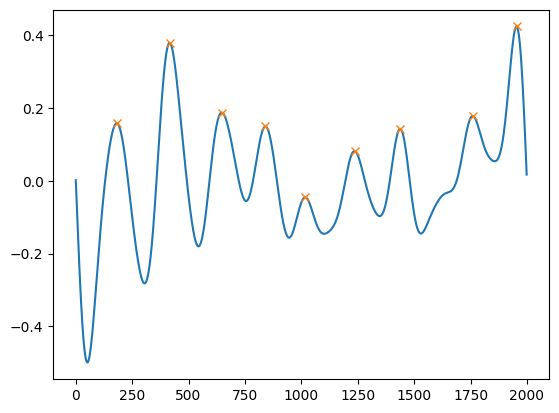

0       0.001434+0.000000j
1      -0.013981-0.000000j
2      -0.029422-0.000000j
3      -0.044872-0.000000j
4      -0.060310+0.000000j
               ...        
1995    0.077451-0.000000j
1996    0.062450+0.000000j
1997    0.047330-0.000000j
1998    0.032108-0.000000j
1999    0.016803-0.000000j
Length: 2000, dtype: complex128

In [22]:
# сильно сглаживает данные и считает количество максимумов. Возвращает количество строк между ними (длина сезона) 
def countPeaksDelta(df, columnName,plot = False):
    from scipy import signal
    defaultSeasonsToReturn = 174
    datasetLength = len(df)
    # df = df.rolling(30).mean()
    df =df.dropna()
    
    df = pd.Series(df[columnName], copy=True) #dataframe['G38 (Вес нетто)']
    peaks, _ = signal.find_peaks(df)
    promin = signal.peak_prominences(df, peaks)[0]
    if plot == True:
        plt.plot(df, "-")
        plt.plot(peaks, df[peaks], "x")
        plt.show()
    
    if len(promin)==0:# если не нашлись пики
        return defaultSeasonsToReturn
    else:
        result = int(datasetLength / len(promin))
        if result<250: # если пиков так мало, что лучше пусть будет стандартное значение
            return result
        else:
            return defaultSeasonsToReturn

        
    

seasoning = countPeaksDelta(signalDF, 0 ,plot = True)

pd.Series(data=signal)

In [23]:
seasoning

222

In [24]:
len(signal)

2000

In [25]:
# тренирует ets  модель, возваращает её и предсказание по данным
def MakeModel(dataframe,seasonal_periods, percentPredict = 30):
    import statsmodels.api as sm
    from statsmodels.tsa.exponential_smoothing.ets import ETSModel
    from statsmodels.tsa.seasonal import STL
    
    BorderRow = int(len(dataframe)/100*percentPredict)
    
    model = ETSModel(
        dataframe,
        error="add",
        trend="add",
        seasonal="add",
        damped_trend=True,
        seasonal_periods=seasonal_periods
    )
    fit = model.fit()
    
    
    units = len(dataframe)
    # pred = fit.get_prediction(start=5, end=units+200)
    pred = fit.get_prediction(start=len(dataframe), end=units+BorderRow)
    df = pred.summary_frame(alpha=0.01)
    return fit, df
    
# model, predictedDF = MakeModel(pd.Series(data=signal), seasonal_periods = seasoning, percentPredict = 50)
model, predictedDF = MakeModel(pd.Series(data=y), seasonal_periods = seasoning, percentPredict = 50)

C:\Users\Xiaomi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


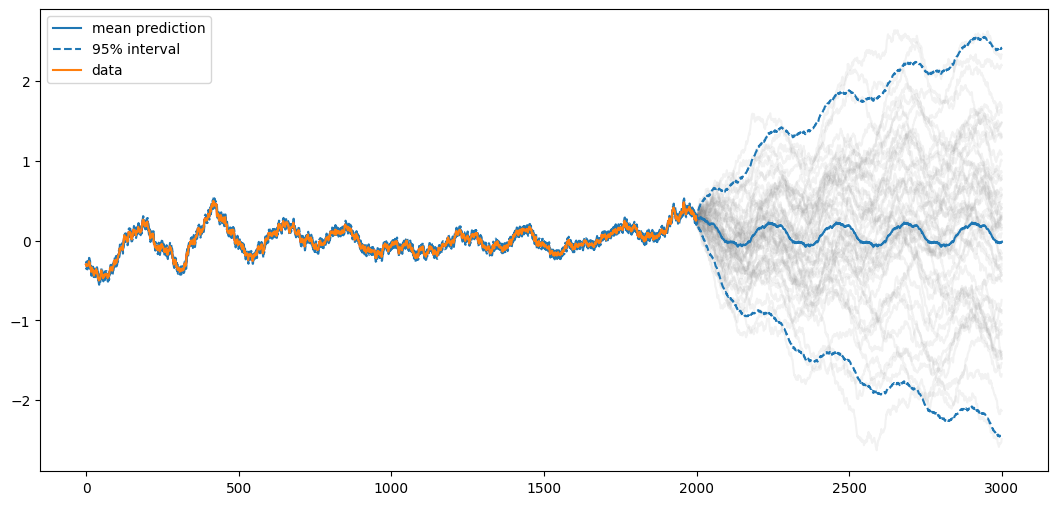

In [26]:
def plotModel(model,columName, dataframe, Count):
    pred = model.get_prediction(start=0, end=len(dataframe)+Count)
    df = pred.summary_frame(alpha=0.05)
    simulated = model.simulate(anchor="end", nsimulations=Count, repetitions=50)
    for i in range(simulated.shape[1]):
        simulated.iloc[:, i].plot(label="_", color="gray", alpha=0.1)
    
    df["mean"].plot(label="mean prediction")
    plt.plot(y, "r")
    df["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
    df["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
    pred.endog.plot(label="data",figsize = (13,6))
    plt.legend()
    plt.show()
    
plotModel(model,0, signalDF,1000)

C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_10736\4164889520.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Averaged"][index] = Average(arrayToCount)


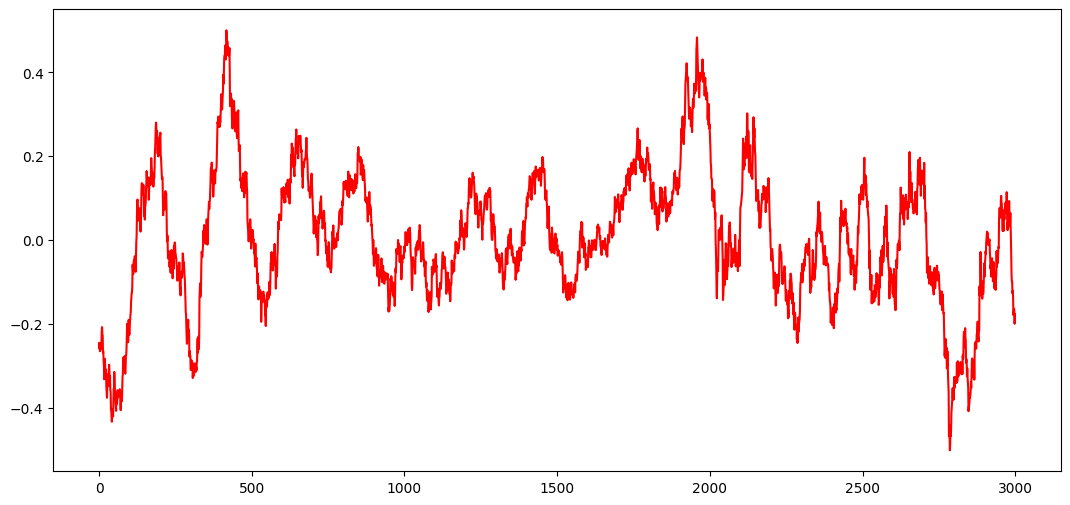

In [27]:
point = -5000   
length = 3000
xx,yy = type2(pandas.read_csv("F.csv"),point-length,point)
# x,y = additionalPrepro(data)
df = pd.DataFrame({"SMA": yy})
for index, row in df.iterrows():
    df.iloc[index, 0] = df.iloc[index, 0]-0.5

# df.plot()                       
xx = df.index.to_numpy()
yy = df.SMA.to_numpy()
# y = df.SMA.rolling(50).mean().to_numpy()


plt.figure(figsize=(13,6))
plt.plot(yy, "r")
plt.show()

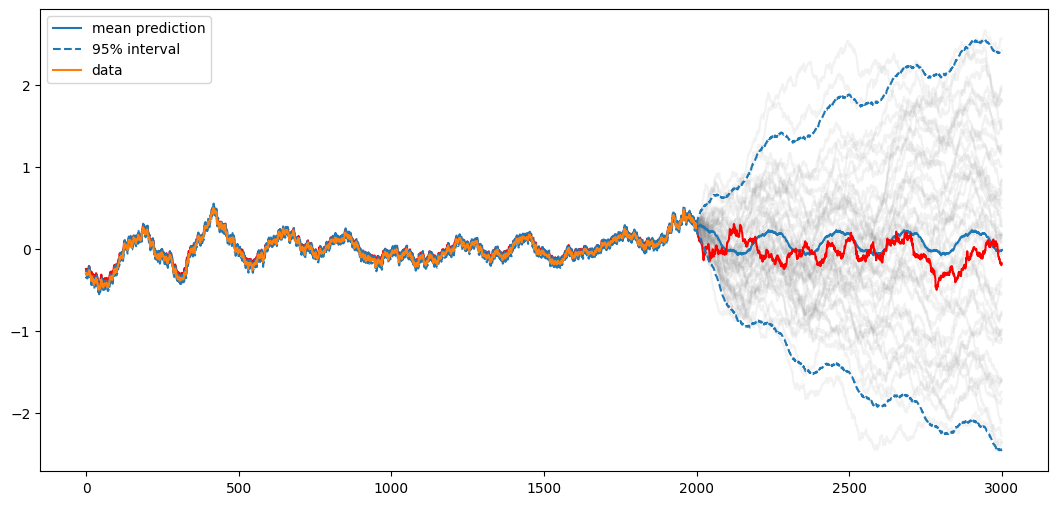

In [28]:
def plotModel(model,columName, dataframe, Count):
    pred = model.get_prediction(start=0, end=len(dataframe)+Count)
    df = pred.summary_frame(alpha=0.05)
    simulated = model.simulate(anchor="end", nsimulations=Count, repetitions=50)
    for i in range(simulated.shape[1]):
        simulated.iloc[:, i].plot(label="_", color="gray", alpha=0.1)
    
    df["mean"].plot(label="mean prediction")
    plt.plot(yy, "r")
    df["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
    df["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
    pred.endog.plot(label="data",figsize = (13,6))
    plt.legend()
    plt.show()
    
plotModel(model,0, signalDF,1000)

In [29]:
# тренирует ets  модель, возваращает её и предсказание по данным
def MakeModel(dataframe,seasonal_periods, percentPredict = 30):
    import statsmodels.api as sm
    from statsmodels.tsa.exponential_smoothing.ets import ETSModel
    from statsmodels.tsa.seasonal import STL
    
    BorderRow = int(len(dataframe)/100*percentPredict)
    
    model = ETSModel(
        dataframe,
        error="add",
        trend="add",
        seasonal="add",
        damped_trend=True,
        seasonal_periods=seasonal_periods
    )
    fit = model.fit()
    
    
    units = len(dataframe)
    # pred = fit.get_prediction(start=5, end=units+200)
    pred = fit.get_prediction(start=len(dataframe), end=units+BorderRow)
    df = pred.summary_frame(alpha=0.01)
    return fit, df
    
# model, predictedDF = MakeModel(pd.Series(data=signal), seasonal_periods = seasoning, percentPredict = 50)
model, predictedDF = MakeModel(pd.Series(data=signal), seasonal_periods = seasoning, percentPredict = 50)

C:\Users\Xiaomi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:894: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._values, dtype)
C:\Users\Xiaomi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Xiaomi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\exponential_smoothing\ets.py:2266: ComplexWarning: Casting complex values to real discards the imaginary part
  self.endog[0: (end - start + 1)] = results.data.endog[


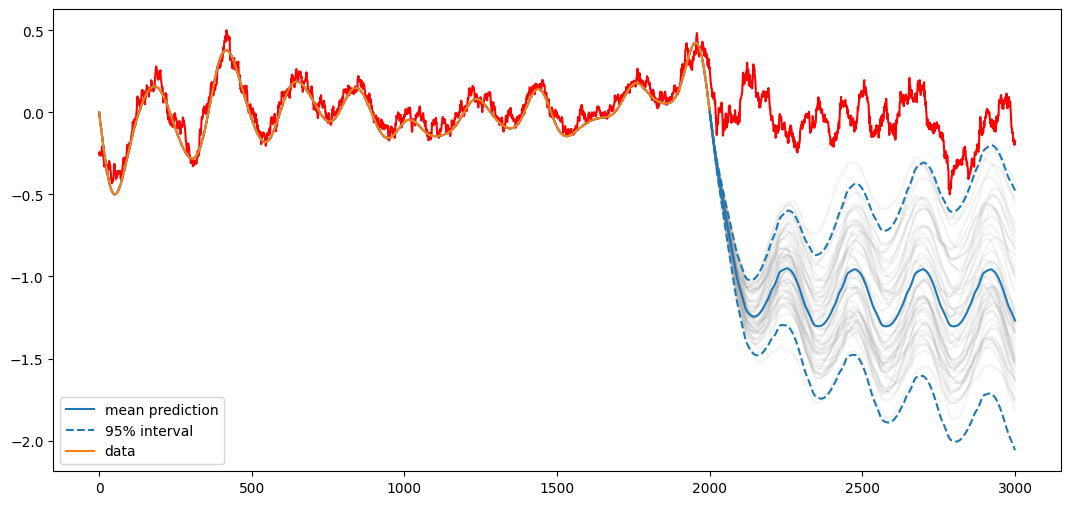

In [30]:
def plotModel(model,columName, dataframe, Count):
    pred = model.get_prediction(start=0, end=len(dataframe)+Count)
    df = pred.summary_frame(alpha=0.05)
    simulated = model.simulate(anchor="end", nsimulations=Count, repetitions=50)
    for i in range(simulated.shape[1]):
        simulated.iloc[:, i].plot(label="_", color="gray", alpha=0.1)
    
    df["mean"].plot(label="mean prediction")
    plt.plot(yy, "r")
    df["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
    df["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
    pred.endog.plot(label="data",figsize = (13,6))
    plt.legend()
    plt.show()
    
plotModel(model,0, signalDF,1000)

In [3]:
def period2freq(period):
    return 1.0 / period * 2.0 * np.pi

def freq2period(freq):
    return 1.0 / freq * 2.0 * np.pi

def decaying_sinusoid(t, a, lam, w):
    return a * np.exp(lam * t) * np.cos(w * t)

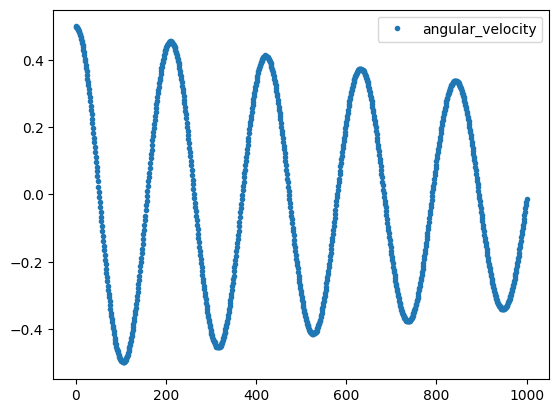

In [4]:
import pandas as pd
radial_gyro_meas = pd.read_csv('bicycle-wheel-radial-inertia-rate-gyro-measurement.csv', index_col='time')





def makeItNormed(data):
    min_max_scaler = preprocessing.MinMaxScaler()
    df_norm = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)
    for index, row in df_norm.iterrows():
        df_norm.iloc[index, 0] = df_norm.iloc[index, 0]-0.5
    return df_norm
radial_gyro_meas = makeItNormed(radial_gyro_meas)
# radial_gyro_meas = radial_gyro_meas.reset_index()

    
    
    
# %matplotlib widget
ax = radial_gyro_meas.plot(style='.')

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
radial_gyro_meas.head()

,angular_velocity
0,0.500000
1,0.499009
2,0.497297
3,0.495676
4,0.493063


<class 'pandas.core.frame.DataFrame'>
12.317252126105082     -14202.339901968437     0.49881570560661537


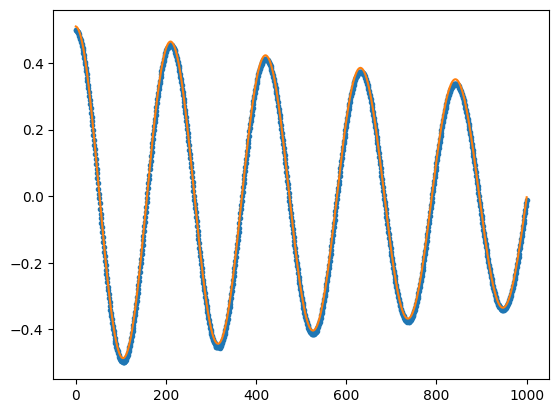

In [6]:
def decaying_sinusoid(t, a, lam, w):
    return a * np.exp(lam * t) * np.cos(w * t)

popt, pcov = curve_fit(decaying_sinusoid,
                       radial_gyro_meas.index,
                       radial_gyro_meas.angular_velocity,
                       p0=(3.0, -0.0002, period2freq(0.44)))

fig, ax = plt.subplots(1, 1)
ax.plot(radial_gyro_meas, '.')
ax.plot(decaying_sinusoid(radial_gyro_meas.index, popt[0], popt[1], popt[2]));
print(type(radial_gyro_meas))
print (freq2period(popt[0]),"   ",freq2period(popt[1]),"   ",freq2period(popt[2])) 

<AxesSubplot:>

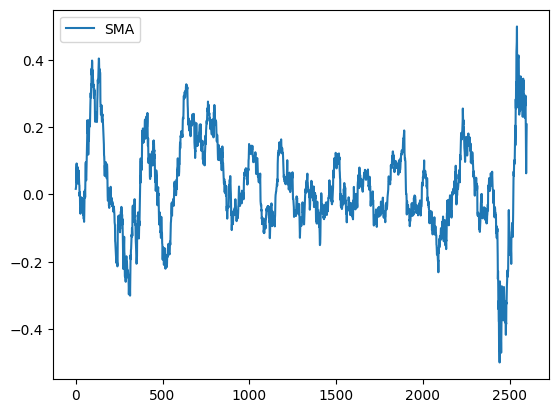

In [7]:
df = pd.DataFrame({"SMA": y})

for index, row in df.iterrows():
    df.iloc[index, 0] = df.iloc[index, 0]-0.5

    
    
# pd.DataFrame(x_scaled)
df.plot()

In [8]:
df.head()

,SMA
0,0.016664
1,0.019339
2,0.025183
3,0.068906
4,0.084038


In [9]:
def decaying_sinusoid(t, a, lam, w):
    return a * np.exp(lam * t) * np.cos(w * t)

popt, pcov = curve_fit(decaying_sinusoid,
                       df.index,
                       df.SMA,
                       p0=(3.0, -0.0002, period2freq(0.44)))


print(type(df))
# fig, ax = plt.subplots(1, 1)
# ax.plot(df, '-')
# ax.plot(decaying_sinusoid(df.index, popt[0], popt[1], popt[2]));

# print (freq2period(popt[0]),"   ",freq2period(popt[1]),"   ",freq2period(popt[2])) 

<class 'pandas.core.frame.DataFrame'>


In [10]:
print(type(radial_gyro_meas))

<class 'pandas.core.frame.DataFrame'>


In [11]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [12]:
radial_gyro_meas.head()

,angular_velocity
0,0.500000
1,0.499009
2,0.497297
3,0.495676
4,0.493063


In [13]:
df.head()

,SMA
0,0.016664
1,0.019339
2,0.025183
3,0.068906
4,0.084038


In [14]:
x = radial_gyro_meas.values

In [15]:
x = df.values
df.reset_index()
y = df.index.values
y[:3]

array([0, 1, 2], dtype=int64)

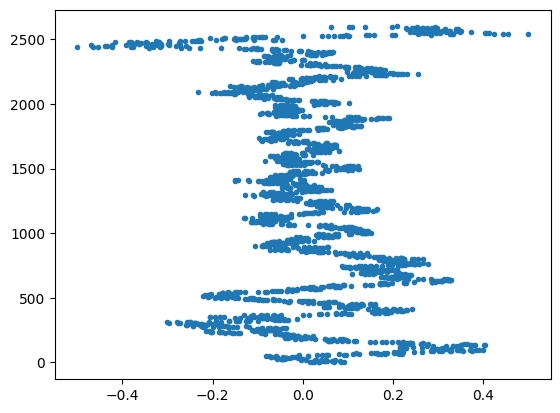

In [16]:
plt.plot(x,y, '.')

In [21]:
def decaying_sinusoid(t, a, lam, w):
    return a * np.exp(lam * t) * np.cos(w * t)

popt, pcov = curve_fit(decaying_sinusoid,
                       df.index,
                       df.SMA,
                       p0=(3.0, -0.0002, period2freq(0.44)))


print(type(df))

<class 'pandas.core.frame.DataFrame'>


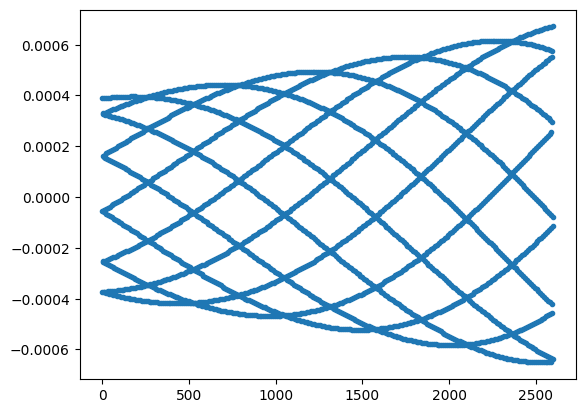

In [27]:
plt.plot(df.index,decaying_sinusoid(df.index, popt[0], popt[1], popt[2]), '.');